In [1]:
import pandas as pd
import numpy as pn

In [10]:
dat = pd.read_csv("data/btc-market-price.csv", header=None)
dat.columns = ["Timestamp", "Price"]

In [11]:
dat.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [15]:
dat.shape

(365, 2)

In [13]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [16]:
dat.tail(3) # show last three rows

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [22]:
dat.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [23]:
dat["Timestamp"] = pd.to_datetime(dat["Timestamp"])

In [24]:
dat.set_index("Timestamp", inplace=True)

In [29]:
dat.loc["2017-05-03"]

Price    1507.576857
Name: 2017-05-03 00:00:00, dtype: float64

In [31]:
df = pd.read_csv("data/btc-market-price.csv", header=None)
df.columns = ["Timestamp", "Price"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace = True)

In [32]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [33]:
df_simple = pd.read_csv(
    "data/btc-market-price.csv",
    header = None,
    names = ["Timestamp", "Price"],
    index_col = 0,
    parse_dates = True
)

In [34]:
df_simple

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


<AxesSubplot:xlabel='Timestamp'>

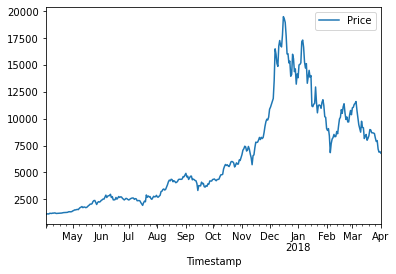

In [36]:
df.plot()

<AxesSubplot:xlabel='Timestamp'>

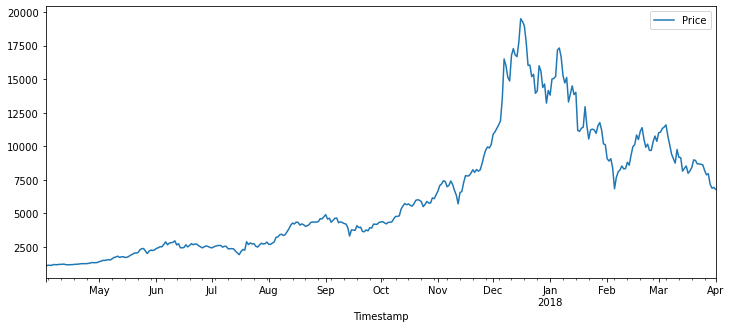

In [39]:
df.plot(figsize=(12, 5)) # Adjust size

In [104]:
eth = pd.read_csv("data/eth-price.csv",
                 parse_dates=True)
eth.columns = ["Timestamp", "UnixT", "Prices"]
eth["Timestamp"] = pd.to_datetime(eth["Timestamp"])

In [105]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  362 non-null    datetime64[ns]
 1   UnixT      362 non-null    int64         
 2   Prices     362 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.6 KB


In [106]:
eth.drop(columns="UnixT")

,Timestamp,Prices
0,2017-04-02,48.55
1,2017-04-03,44.13
2,2017-04-04,44.43
3,2017-04-05,44.90
4,2017-04-06,43.23
...,...,...
357,2018-03-28,445.93
358,2018-03-29,383.90
359,2018-03-30,393.82
360,2018-03-31,394.07


In [122]:
eth = eth.set_index(eth["Timestamp"])

In [114]:
prices = pd.DataFrame(index = dat.index)

In [123]:
prices["Bitcoin"] = dat["Price"]
prices["Ether"] = eth["Prices"]

In [124]:
prices

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<AxesSubplot:xlabel='Timestamp'>

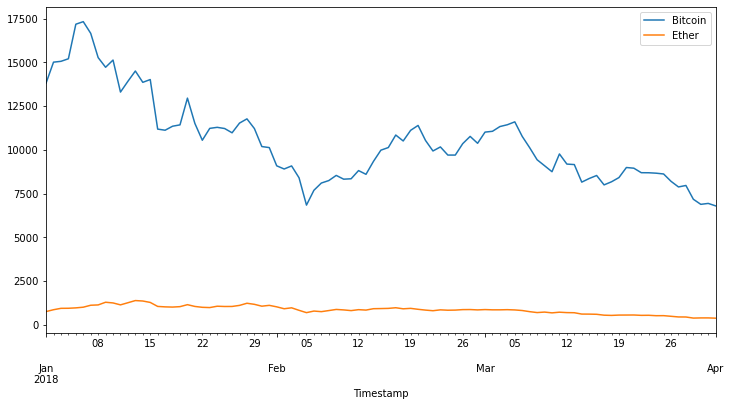

In [127]:
prices.loc["2018-01-01":"2018-12-30"].plot(figsize = (12,6))